In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image

from tensorflow import keras

from sklearn import model_selection
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

from tensorflow import keras

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
dir = os.path.dirname
path = dir(os.getcwd())
sys.path.append(path)
from sklearn.metrics import confusion_matrix, classification_report  
import SRC.utils_.models as md
from notebooks.df_final import df
import SRC.utils_.mining_data_tb as mn
import SRC.utils_.visualization_tb as vs
from sklearn.svm import LinearSVC



c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
c:\Users\Administrator\Desktop\TheBridge\Bootcamp-DataScience-2021\MachineLearning
                                              Lesiones             tipos  \
0    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
1    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
2    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
3    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
..                                                 ...               ...   
587  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymphangiectasia   
588  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  Lymp

In [2]:
X_train,X_test,Y_train,Y_test = md.particion (df,"tipos","Lesiones")


In [6]:
X_train, X_test = md.normalizacion (X_train,X_test)

In [7]:
cnn2_mejor = keras.models.load_model('models/cnn2_mejor.h5')


In [8]:

cnn1_mejor = keras.models.load_model('models/cnn1_mejor.h5')

In [9]:
vgg16 = keras.models.load_model('models/VGG16.h5')

In [10]:
resnet50 = keras.models.load_model('models/resnet50.h5')

In [11]:
y_pred_cnn2,predVSreal_cnn2= md.prediccion_guardar(cnn2_mejor,"cnn2",X_train,Y_train,X_test,Y_test)

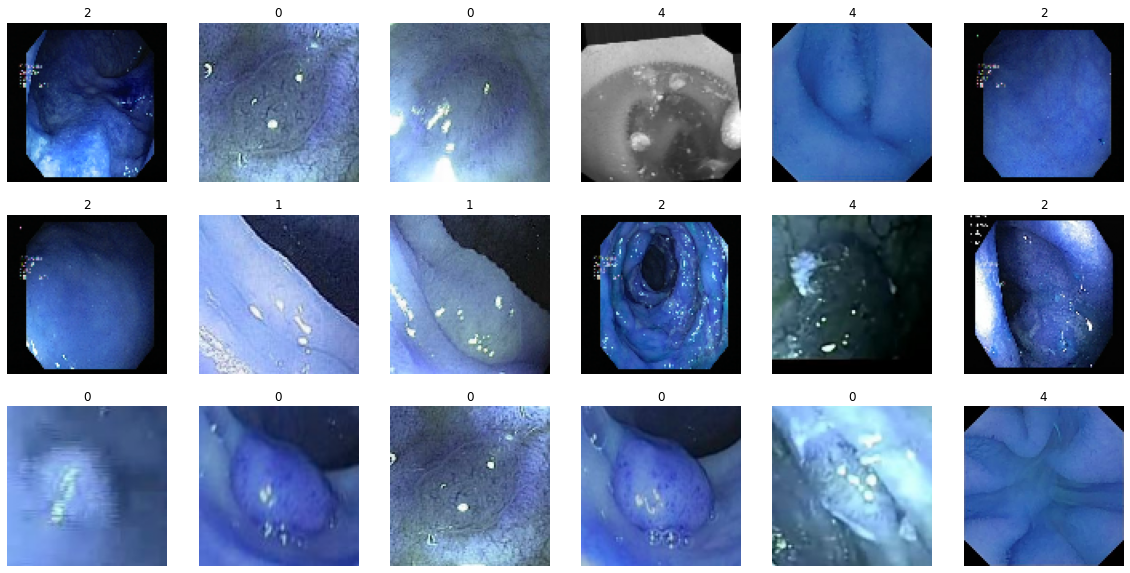

In [12]:
vs.predicciones_vs_verdad(X_test,y_pred_cnn2)
#Adenoma":0,"Hyperplastic":1,"Ulcer":2,"Normal_clean_mucosa":3,"Lymphangiectasia":4

In [13]:
y_pred_cnn1,predVSreal_cnn1= md.prediccion_guardar(cnn1_mejor,"cnn1",X_train,Y_train,X_test,Y_test)

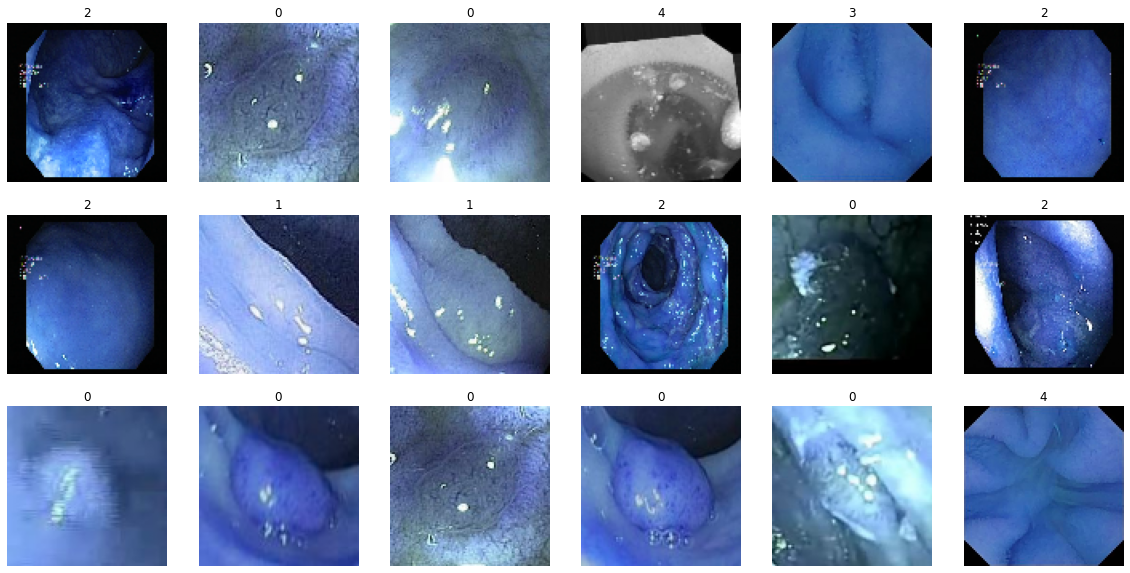

In [14]:
vs.predicciones_vs_verdad(X_test,y_pred_cnn1)

#Adenoma":0,"Hyperplastic":1,"Ulcer":2,"Normal_clean_mucosa":3,"Lymphangiectasia":4

In [15]:
y_pred_vgg16,predVSreal_vgg16= md.prediccion_guardar(vgg16,"vgg16",X_train,Y_train,X_test,Y_test)

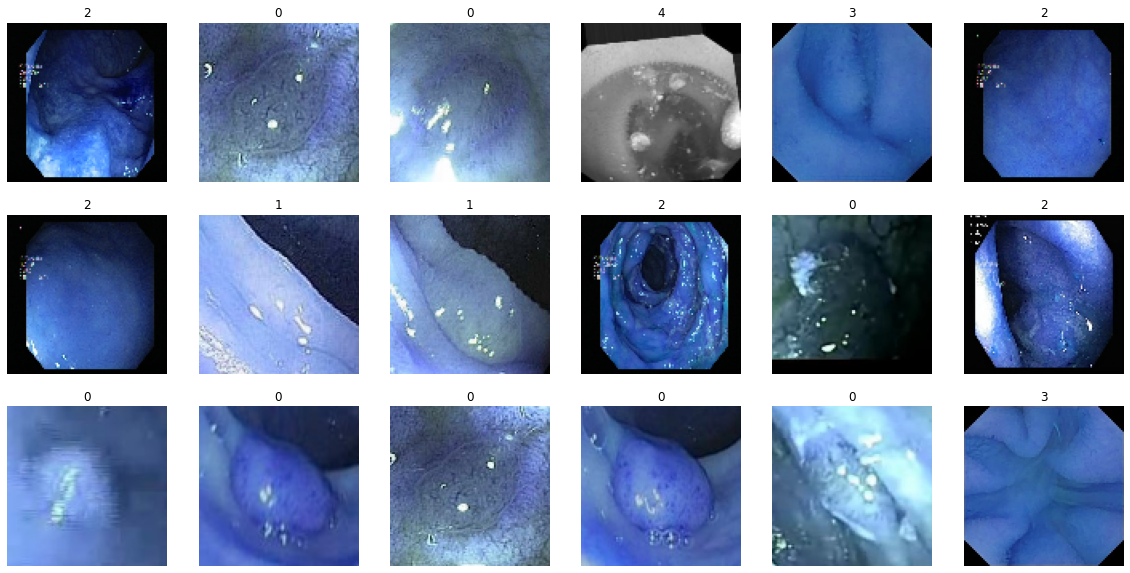

In [16]:
vs.predicciones_vs_verdad(X_test,y_pred_vgg16)
#Adenoma":0,"Hyperplastic":1,"Ulcer":2,"Normal_clean_mucosa":3,"Lymphangiectasia":4

In [17]:
y_pred_resnet50,predVSreal_cnn1= md.prediccion_guardar(resnet50,"resnet50",X_train,Y_train,X_test,Y_test)

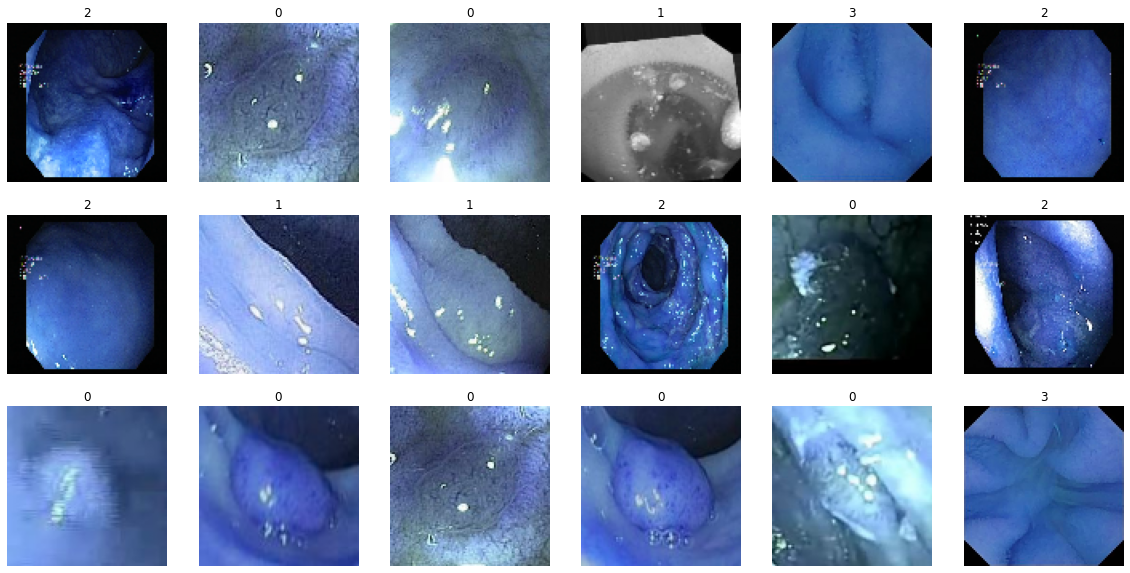

In [18]:
vs.predicciones_vs_verdad(X_test,y_pred_resnet50)

In [19]:
Test_random_score_cnn2 = md.estadisticas(cnn2_mejor,"cnn2",X_train,Y_train,X_test,Y_test,y_pred_cnn2)

68/68 [==============================] - 3s 20ms/step - loss: 0.4422 - accuracy: 0.8389


In [20]:
Test_random_score_cnn1 = md.estadisticas(cnn1_mejor,"cnn1",X_train,Y_train,X_test,Y_test,y_pred_cnn1)

68/68 [==============================] - 3s 23ms/step - loss: 0.1577 - accuracy: 0.9485


In [21]:
Test_random_score_vgg16 = md.estadisticas(vgg16,"vgg16",X_train,Y_train,X_test,Y_test,y_pred_vgg16)

68/68 [==============================] - 82s 1s/step - loss: 0.2052 - accuracy: 0.9615


In [22]:
Test_random_score_resnet50 = md.estadisticas(resnet50,"resnet50",X_train,Y_train,X_test,Y_test,y_pred_resnet50)

68/68 [==============================] - 46s 657ms/step - loss: 0.5255 - accuracy: 0.8175


In [23]:

predicciones_vs_real = mn.predicciones_vs_real(y_pred_cnn2,y_pred_cnn1,y_pred_vgg16,y_pred_resnet50,Y_test)

In [24]:
union = mn.union_sql(Test_random_score_cnn2,Test_random_score_cnn1,Test_random_score_vgg16,Test_random_score_resnet50)

In [25]:
union.sort_values(["score"], ascending=False,inplace=True)
union.to_csv( "data" + os.sep + ("union.csv"),index=False)

In [ ]:
#no funciona el modelo en el ordenador y no he tenido tiempo para runear en el google collab. 
"""
X_train1,X_test1 = mn.reshapeo(X_train,X_test)

svc = md.modelaje("svc",X_train,Y_train)"""



'\nX_train1,X_test1 = mn.reshapeo(X_train,X_test)\n\nsvc = md.modelaje("svc",X_train,Y_train)'

In [26]:
union.head()

,model,parameters,recall,score
0,vgg16,x0 = layers.Flatten()(base_model.output) x1 =...,0.5525,0.961467
0,cnn1,"([keras.layers.Conv2D(filters=8, kernel_size=...",0.5544,0.948468
0,cnn2,"keras.layers.Conv2D(filters=8, kernel_size=(3,...",0.5548,0.838904
0,resnet50,x0 = layers.Flatten()(base_model.output) x1 =...,0.5684,0.817549


In [ ]:
predicciones_vs_real.head()